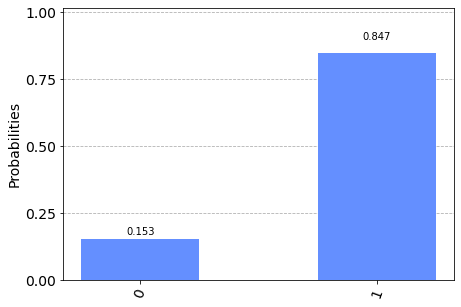

In [10]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise

# Error probabilities
prob_1 = 0.3  # 1-qubit gate
prob_2 = 0.3  # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx', 'cz', 'crx', 'cry', 'crz'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Make a circuit
circ = QuantumCircuit(1, 1)
circ.x(0)
circ.measure([0], [0])

# Perform a noise simulation
result = execute(circ, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model,
                 shots=10000).result()
counts = result.get_counts(0)
plot_histogram(counts)